In [2]:
import re
import pandas as pd
import numpy as np

### Inputs

In [3]:
estado = "SP"
entrega_n = "Completa"

input_fst = f"./output/{estado}/Seguradoras/Entrega {entrega_n}/Dados 1ra Instancia.xlsx"
input_sec = f"./output/{estado}/Seguradoras/Entrega {entrega_n}/Dados 2da Instancia.xlsx"
out_file  = f"./output/{estado}/Seguradoras/Entrega {entrega_n}/Dados Completos.xlsx"

In [4]:
data_fst = pd.read_excel(input_fst, index_col=0)
data_sec = pd.read_excel(input_sec, index_col=0)

In [5]:
data_fst.head(2)

,Processo,Ação,Assunto,Valor da Causa,Requerido,Requerente,Qualificação,Juiz,Local,Vara,Juizado Especial,Data de distribuição,Situação processual,Data da última movimentação,Última movimentação,Possui Incidentes?,Quais Incidentes?,Cumprimento de Sentença?,Url
0,00130517220238260002,Cumprimento de sentença (0013051-72.2023.8.26....,Indenização Por Dano Moral,NaN,'liberty seguros s/a',"'Jocelino Dos Santos Oliveira', 'Ana Claudia G...",Pessoa Fisica,NaN,Foro Regional II - Santo Amaro,1ª Vara do Juizado Especial Cível,True,25/05/2023 às 12:49,NaN,19/03/2024,"Certidão de Publicação Expedida, Relação: 0157...",False,None,False,https://esaj.tjsp.jus.br/cpopg/show.do?process...
1,10037131620238260533,Procedimento Comum Cível,Seguro,"R$ 112.160,40","'bradesco vida e previdencia s/a', 'banco brad...",'Nivaldo Rodrigues Da Silva',Pessoa Fisica,Elizabeth Shalders De Oliveira Roxo,Foro de Santa Bárbara d'Oeste,2ª Vara Cível,False,23/05/2023 às 18:01 - Livre,NaN,26/03/2024,"Apelação/Razões Juntada, Nº Protocolo: WSBT.24...",False,None,False,https://esaj.tjsp.jus.br/cpopg/show.do?process...


In [11]:
data_sec.head(2)

,Numero_1st,Local_1st,Vara_1st,Juiz_1st,Obs_1st,Processo,Ação,Assunto,Outros Assuntos,Valor da Causa,...,Area,Situação Processual,Data Julgamento,Situação Julgamento,Decisão Julgamento,Data da Última Movimentação,Última Movimentação,Possui Incidentes,Quais Incidentes,Url
0,1001472-43.2022.8.26.0456 (Principal),Foro de Pirapozinho,2ª Vara Judicial,Alessandro Correa Leite,-,10014724320228260456,Apelação Cível,Direito Civil - Obrigações - Espécies De Contr...,NaN,"17.554,50",...,Cível,Encerrado,19/12/2023,Julgado,Negaram provimento aos recursos. V. U.,22/02/2024,"Expedido Certidão de Baixa de Recurso, Certidã...",False,None,"https://esaj.tjsp.jus.br/cposg/search.do,jsess..."
1,1001494-69.2022.8.26.0596 (Principal),Foro de Serrana,2 ª Vara,Marcilio Moreira De Castro,-,10014946920228260596,Apelação Cível,Direito Civil - Obrigações - Espécies De Contr...,NaN,"15.675,11",...,Cível,NaN,NaN,NaN,NaN,22/03/2024,"Publicado em, Disponibilizado em 21/03/2024 Ti...",False,None,https://esaj.tjsp.jus.br/cposg/search.do?conve...


#### Olha os dados

In [12]:
def fix_num(num):
    try:
        return float(num)
    except:
        return float("nan")

In [13]:
test = data_fst["Valor da Causa"].str.strip().str.replace("R$", "", regex=False)
test = test.str.replace(".", "", regex=False).str.replace(",", ".", regex=False)
test = test.apply(fix_num)

<AxesSubplot: >

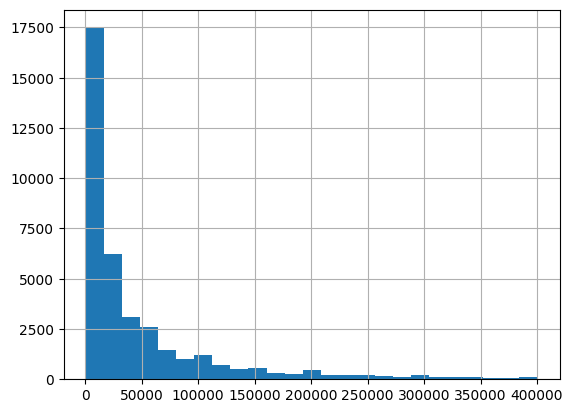

In [14]:
test[test.between(test.quantile(0.05), test.quantile(0.95))].hist(bins=25)

### Une os dados

#### Verifica se existem dados faltantes na primeira instancia

In [15]:
missing_in_first = data_sec[~data_sec["Processo"].isin(data_fst["Processo"])]
missing_in_first.head(2)

,Numero_1st,Local_1st,Vara_1st,Juiz_1st,Obs_1st,Processo,Ação,Assunto,Outros Assuntos,Valor da Causa,...,Area,Situação Processual,Data Julgamento,Situação Julgamento,Decisão Julgamento,Data da Última Movimentação,Última Movimentação,Possui Incidentes,Quais Incidentes,Url


In [16]:
print("Dados presentes na primeira instancia:", len(data_fst))
print("Dados presentes na segunda  instancia:", len(data_sec))
print("---" * 10)
print("Dados faltantes na primeira instancia:", len(missing_in_first))

Dados presentes na primeira instancia: 45637
Dados presentes na segunda  instancia: 45637
------------------------------
Dados faltantes na primeira instancia: 0


#### Realiza o merge dos dados

In [17]:
data_fst.columns = [f"1st_{c}" for c in data_fst.columns]
data_sec.columns = [f"2nd_{c}" for c in data_sec.columns]

In [40]:
merged_df = pd.merge(data_fst, data_sec, left_on="1st_Processo", right_on="2nd_Processo", how="outer")
merged_df.columns = pd.MultiIndex.from_tuples([(c.split("_")[0], "_".join(c.split("_")[1:])) for c in merged_df.columns])

### Realiza outros filtros

In [41]:
# Filtro para as datas sairem como datas mesmo
dts = pd.to_datetime(merged_df[("1st", "Data de distribuição")].str.split(" às ").str[0].replace("-", "NaT"), dayfirst=True)
merged_df[("1st", "Data de distribuição")] = dts

In [42]:
merged_df.head(2)

1st                                                     \
               Processo                                               Ação   
0  00130517220238260002  Cumprimento de sentença (0013051-72.2023.8.26....   
1  00130517220238260002  Cumprimento de sentença (0013051-72.2023.8.26....   

                                                                     \
                      Assunto Valor da Causa              Requerido   
0  Indenização Por Dano Moral            NaN  'liberty seguros s/a'   
1  Indenização Por Dano Moral            NaN  'liberty seguros s/a'   

                                                                          \
                                          Requerente   Qualificação Juiz   
0  'Jocelino Dos Santos Oliveira', 'Ana Claudia G...  Pessoa Fisica  NaN   
1  'Jocelino Dos Santos Oliveira', 'Ana Claudia G...  Pessoa Fisica  NaN   

                                                                      ...  \
                            Local                               Vara  ...   
0  Foro Regional II - Santo Amaro  1ª Vara do Juizado Especial Cível  ...   
1  Foro Regional II - Santo Amaro  1ª Vara do Juizado Especial Cível  ...   

   2nd                                                          \
  Area Situação Processual Data Julgamento Situação Julgamento   
0    -                   -               -                   -   
1    -                   -               -                   -   

                                                                      \
  Decisão Julgamento Data da Última Movimentação Última Movimentação   
0                  -                           -                   -   
1                  -                           -                   -   

                                          
  Possui Incidentes Quais Incidentes Url  
0                 -                -   -  
1                 -                -   -  

[2 rows x 49 columns]

In [43]:
# Filtro para valores financeiros serem lidos como floats
moneys = merged_df[("1st", "Valor da Causa")].map(
    lambda x: x.replace("R$ ", "").replace(".", "") if isinstance(x, str) else x
).str.split(",").str[0]
merged_df[("1st", "Valor da Causa")] = moneys

In [44]:
merged_df.head(2)

1st                                                     \
               Processo                                               Ação   
0  00130517220238260002  Cumprimento de sentença (0013051-72.2023.8.26....   
1  00130517220238260002  Cumprimento de sentença (0013051-72.2023.8.26....   

                                                                     \
                      Assunto Valor da Causa              Requerido   
0  Indenização Por Dano Moral            NaN  'liberty seguros s/a'   
1  Indenização Por Dano Moral            NaN  'liberty seguros s/a'   

                                                                          \
                                          Requerente   Qualificação Juiz   
0  'Jocelino Dos Santos Oliveira', 'Ana Claudia G...  Pessoa Fisica  NaN   
1  'Jocelino Dos Santos Oliveira', 'Ana Claudia G...  Pessoa Fisica  NaN   

                                                                      ...  \
                            Local                               Vara  ...   
0  Foro Regional II - Santo Amaro  1ª Vara do Juizado Especial Cível  ...   
1  Foro Regional II - Santo Amaro  1ª Vara do Juizado Especial Cível  ...   

   2nd                                                          \
  Area Situação Processual Data Julgamento Situação Julgamento   
0    -                   -               -                   -   
1    -                   -               -                   -   

                                                                      \
  Decisão Julgamento Data da Última Movimentação Última Movimentação   
0                  -                           -                   -   
1                  -                           -                   -   

                                          
  Possui Incidentes Quais Incidentes Url  
0                 -                -   -  
1                 -                -   -  

[2 rows x 49 columns]

In [45]:
# Filtro para range de tempo
delta_dates = (pd.to_datetime("today") - merged_df[("1st", "Data de distribuição")])
range_dates = (
    (delta_dates >= pd.Timedelta('182D')) & (delta_dates <= pd.Timedelta('2920D'))
)
merged_df[("1st", "Mais que 6 meses e menos que 8 anos")] = range_dates
merged_df.head(2)

1st                                                     \
               Processo                                               Ação   
0  00130517220238260002  Cumprimento de sentença (0013051-72.2023.8.26....   
1  00130517220238260002  Cumprimento de sentença (0013051-72.2023.8.26....   

                                                                     \
                      Assunto Valor da Causa              Requerido   
0  Indenização Por Dano Moral            NaN  'liberty seguros s/a'   
1  Indenização Por Dano Moral            NaN  'liberty seguros s/a'   

                                                                          \
                                          Requerente   Qualificação Juiz   
0  'Jocelino Dos Santos Oliveira', 'Ana Claudia G...  Pessoa Fisica  NaN   
1  'Jocelino Dos Santos Oliveira', 'Ana Claudia G...  Pessoa Fisica  NaN   

                                                                      ...  \
                            Local                               Vara  ...   
0  Foro Regional II - Santo Amaro  1ª Vara do Juizado Especial Cível  ...   
1  Foro Regional II - Santo Amaro  1ª Vara do Juizado Especial Cível  ...   

                  2nd                                                         \
  Situação Processual Data Julgamento Situação Julgamento Decisão Julgamento   
0                   -               -                   -                  -   
1                   -               -                   -                  -   

                                                                     \
  Data da Última Movimentação Última Movimentação Possui Incidentes   
0                           -                   -                 -   
1                           -                   -                 -   

                                                       1st  
  Quais Incidentes Url Mais que 6 meses e menos que 8 anos  
0                -   -                                True  
1                -   -                                True  

[2 rows x 50 columns]

In [46]:
merged_df[("2nd", "Apelante")]

0                                                        -
1                                                        -
2                                                        -
3                                                        -
4                                   'Lidia Paulo De Assis'
                               ...                        
45633                  'Lma Transportes De Cargas Ltda Me'
45634                        'Donizeti Machado Dos Santos'
45635    'Robson Cristiano Krepiski Formoso', 'Sandra C...
45636                                                    -
45637                        'Renato Pose Dos Santos Lima'
Name: (2nd, Apelante), Length: 45638, dtype: object

## MUDAR SEGURADORAS !!!

In [47]:
# Filtro por Apelante
def find_seguradora(x):
    if not isinstance(x, str):
        return False
    if x == "-":
        return False
    else:
        x = x.lower()

    seguradoras = ["bb", "bradesco", "brasilprev", "caixa", "itau", "itáu", "porto seguro", "safra",
                   "sul america", "sul américa", "zurich"]
    
    seguradoras += ["chubb", "prudential"]
    
    seguradoras += ["aig", "akad", "alfa", "aliança", "allianz", "american life", "assurant",
                    "atradius", "berkley", "bmg", "brasilseg", "btg", "caixa", "cardif", "cesce",
                    "coface", "companhia de seguros", "cia de seguros", "cia seguros", "escebrasil",
                    "euler hermes", "ezze", "fairfax", "fairway", "fator", "hdi", "indiana", "kovr", 
                    "liberty", "mapfre", "metropolitan", "mitsui", "omint", "pier", "santander",
                    "sura", "sompo", "swiss", "tarr", "tokio", "too", "unimed", "usebens", "xs2"]
    
    for seg in seguradoras:
        if seg in x:
            return True
    else:
        return False

merged_df[("2nd", "Seguradora é apelante")] = merged_df[("2nd", "Apelante")].map(find_seguradora)
merged_df.head(2)

1st                                                     \
               Processo                                               Ação   
0  00130517220238260002  Cumprimento de sentença (0013051-72.2023.8.26....   
1  00130517220238260002  Cumprimento de sentença (0013051-72.2023.8.26....   

                                                                     \
                      Assunto Valor da Causa              Requerido   
0  Indenização Por Dano Moral            NaN  'liberty seguros s/a'   
1  Indenização Por Dano Moral            NaN  'liberty seguros s/a'   

                                                                          \
                                          Requerente   Qualificação Juiz   
0  'Jocelino Dos Santos Oliveira', 'Ana Claudia G...  Pessoa Fisica  NaN   
1  'Jocelino Dos Santos Oliveira', 'Ana Claudia G...  Pessoa Fisica  NaN   

                                                                      ...  \
                            Local                               Vara  ...   
0  Foro Regional II - Santo Amaro  1ª Vara do Juizado Especial Cível  ...   
1  Foro Regional II - Santo Amaro  1ª Vara do Juizado Especial Cível  ...   

              2nd                                         \
  Data Julgamento Situação Julgamento Decisão Julgamento   
0               -                   -                  -   
1               -                   -                  -   

                                                                     \
  Data da Última Movimentação Última Movimentação Possui Incidentes   
0                           -                   -                 -   
1                           -                   -                 -   

                                                       1st  \
  Quais Incidentes Url Mais que 6 meses e menos que 8 anos   
0                -   -                                True   
1                -   -                                True   

                    2nd  
  Seguradora é apelante  
0                 False  
1                 False  

[2 rows x 51 columns]

In [48]:
# Filtro por Requerentes
def find_seguradora(x):
    if not isinstance(x, str):
        return False
    if x == "-":
        return False
    else:
        x = x.lower()

    seguradoras = ["bb", "bradesco", "brasilprev", "caixa", "itau", "itáu", "porto seguro", "safra",
                   "sul america", "sul américa", "zurich"]
    
    seguradoras += ["chubb", "prudential"]
    
    seguradoras += ["aig", "akad", "alfa", "aliança", "allianz", "american life", "assurant",
                    "atradius", "berkley", "bmg", "brasilseg", "btg", "caixa", "cardif", "cesce",
                    "coface", "companhia de seguros", "cia de seguros", "cia seguros", "escebrasil",
                    "euler hermes", "ezze", "fairfax", "fairway", "fator", "hdi", "indiana", "kovr", 
                    "liberty", "mapfre", "metropolitan", "mitsui", "omint", "pier", "santander",
                    "sura", "sompo", "swiss", "tarr", "tokio", "too", "unimed", "usebens", "xs2"]
    
    for seg in seguradoras:
        if seg in x:
            return True
    else:
        return False

merged_df[("1st", "Seguradora é Requerente")] = merged_df[("1st", "Requerente")].map(find_seguradora)
merged_df.head(2)

1st                                                     \
               Processo                                               Ação   
0  00130517220238260002  Cumprimento de sentença (0013051-72.2023.8.26....   
1  00130517220238260002  Cumprimento de sentença (0013051-72.2023.8.26....   

                                                                     \
                      Assunto Valor da Causa              Requerido   
0  Indenização Por Dano Moral            NaN  'liberty seguros s/a'   
1  Indenização Por Dano Moral            NaN  'liberty seguros s/a'   

                                                                          \
                                          Requerente   Qualificação Juiz   
0  'Jocelino Dos Santos Oliveira', 'Ana Claudia G...  Pessoa Fisica  NaN   
1  'Jocelino Dos Santos Oliveira', 'Ana Claudia G...  Pessoa Fisica  NaN   

                                                                      ...  \
                            Local                               Vara  ...   
0  Foro Regional II - Santo Amaro  1ª Vara do Juizado Especial Cível  ...   
1  Foro Regional II - Santo Amaro  1ª Vara do Juizado Especial Cível  ...   

                  2nd                                                 \
  Situação Julgamento Decisão Julgamento Data da Última Movimentação   
0                   -                  -                           -   
1                   -                  -                           -   

                                                              \
  Última Movimentação Possui Incidentes Quais Incidentes Url   
0                   -                 -                -   -   
1                   -                 -                -   -   

                                  1st                   2nd  \
  Mais que 6 meses e menos que 8 anos Seguradora é apelante   
0                                True                 False   
1                                True                 False   

                      1st  
  Seguradora é Requerente  
0                   False  
1                   False  

[2 rows x 52 columns]

### Removendo processos até o momento

In [49]:
with open('./meta/SP/Seguradoras/Entrega Completa/processos_ate_o_momento.txt', 'r') as f:
    processo_ate = [processo.replace("\n","") for processo in f]
    
processo_ate = pd.Series(processo_ate)

In [50]:
merged_df.shape

(45638, 52)

In [51]:
merged_df = merged_df[~merged_df[("1st", "Processo")].isin(processo_ate)]

In [52]:
merged_df.shape

(26772, 52)

### Removendo processos duplicados

In [55]:
def find_repeated_values(series):
    # Count the occurrences of each value in the series
    value_counts = series.value_counts()
    
    # Filter for values that have more than one occurrence
    repeated_values = value_counts[value_counts > 1].index.tolist()
    
    return repeated_values

In [61]:
writer = pd.ExcelWriter(out_file, engine="xlsxwriter", options={'strings_to_urls': False})
merged_df.sort_index(axis=1, level=0, sort_remaining=False).to_excel(writer)
writer.close()

C:\Users\A1\AppData\Local\Temp\ipykernel_10356\3809290224.py:1: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  writer = pd.ExcelWriter(out_file, engine="xlsxwriter", options={'strings_to_urls': False})


In [59]:
merged_df[merged_df[("1st", "Processo")].duplicated(keep=False) & ~merged_df[("1st", "Processo")].isna()]

1st                                                     \
               Processo                                               Ação   
0  00130517220238260002  Cumprimento de sentença (0013051-72.2023.8.26....   
1  00130517220238260002  Cumprimento de sentença (0013051-72.2023.8.26....   

                                                                     \
                      Assunto Valor da Causa              Requerido   
0  Indenização Por Dano Moral            NaN  'liberty seguros s/a'   
1  Indenização Por Dano Moral            NaN  'liberty seguros s/a'   

                                                                          \
                                          Requerente   Qualificação Juiz   
0  'Jocelino Dos Santos Oliveira', 'Ana Claudia G...  Pessoa Fisica  NaN   
1  'Jocelino Dos Santos Oliveira', 'Ana Claudia G...  Pessoa Fisica  NaN   

                                                                      ...  \
                            Local                               Vara  ...   
0  Foro Regional II - Santo Amaro  1ª Vara do Juizado Especial Cível  ...   
1  Foro Regional II - Santo Amaro  1ª Vara do Juizado Especial Cível  ...   

                  2nd                                                 \
  Situação Julgamento Decisão Julgamento Data da Última Movimentação   
0                   -                  -                           -   
1                   -                  -                           -   

                                                              \
  Última Movimentação Possui Incidentes Quais Incidentes Url   
0                   -                 -                -   -   
1                   -                 -                -   -   

                                  1st                   2nd  \
  Mais que 6 meses e menos que 8 anos Seguradora é apelante   
0                                True                 False   
1                                True                 False   

                      1st  
  Seguradora é Requerente  
0                   False  
1                   False  

[2 rows x 52 columns]

In [60]:
merged_df[merged_df[("1st", "Processo")].duplicated(keep=False)]

1st                                                     \
               Processo                                               Ação   
0  00130517220238260002  Cumprimento de sentença (0013051-72.2023.8.26....   
1  00130517220238260002  Cumprimento de sentença (0013051-72.2023.8.26....   

                                                                     \
                      Assunto Valor da Causa              Requerido   
0  Indenização Por Dano Moral            NaN  'liberty seguros s/a'   
1  Indenização Por Dano Moral            NaN  'liberty seguros s/a'   

                                                                          \
                                          Requerente   Qualificação Juiz   
0  'Jocelino Dos Santos Oliveira', 'Ana Claudia G...  Pessoa Fisica  NaN   
1  'Jocelino Dos Santos Oliveira', 'Ana Claudia G...  Pessoa Fisica  NaN   

                                                                      ...  \
                            Local                               Vara  ...   
0  Foro Regional II - Santo Amaro  1ª Vara do Juizado Especial Cível  ...   
1  Foro Regional II - Santo Amaro  1ª Vara do Juizado Especial Cível  ...   

                  2nd                                                 \
  Situação Julgamento Decisão Julgamento Data da Última Movimentação   
0                   -                  -                           -   
1                   -                  -                           -   

                                                              \
  Última Movimentação Possui Incidentes Quais Incidentes Url   
0                   -                 -                -   -   
1                   -                 -                -   -   

                                  1st                   2nd  \
  Mais que 6 meses e menos que 8 anos Seguradora é apelante   
0                                True                 False   
1                                True                 False   

                      1st  
  Seguradora é Requerente  
0                   False  
1                   False  

[2 rows x 52 columns]